# I. Lý thuyết

1) Trong thuật toán YOLO thì biến mục tiêu bao gồm những thành phần nào ?

**A. Điểm xác suất tồn tại object, bounding box, phân phối xác suất classes. Trường hợp không tồn tại object thì các thành phần khác bỏ trống.**

B. Điểm xác suất tồn tại object, bounding box, phân phối xác suất classes.

C. Điểm IoU, bounding box, phân phối xác suất classes.

D. Bounding box và phân phối xác suất classes.

2) Điều gì khiến cho việc dự báo bounding box trong YOLOv2 ổn định hơn so với trước đó?
Bạn có thể tham khảo thêm tổng hợp các cải tiến của [YOLOv2](https://www.geeksforgeeks.org/yolo-v2-object-detection/)

A. Điểm số confidence score của mỗi bounding box được nhân thêm với IoU(prediction, ground truth).

**B. Coordinator gốc (x, y ,w, h)  được chuyển sang các tham số transformed tương ứng là (tx, ty, tw, th) theo hàm sigmoid và exponential nên ổn định hơn.** 

C. YOLOv2 được huấn luyện trên nhiều epoches hơn.

D. Hàm Non Max Suppression trong Post-Processing của YOLOv2 được cải tiến.
 
3) Ý tưởng chính của các thuật toán Keypoint Object Detection là gì?

A. Dựa trên các Anchor Box được phân về mỗi một vật thể để hồi qui ra Prediction Box.

B. Tìm ra các vùng Region Proposal tiềm năng chứa vật thể, crop và resize chúng và áp dụng bài toán classification trên mạng CNN để phát hiện vật thể.

**C. Sử dụng bản đồ heatmap để tìm ra các keypoints mà những keypoints này giúp định hình bounding boxes.**

D. Tập bounding boxes dự báo được ghép cặp 1:1 với ground truth boxes (đã được padding bằng phần tử rỗng để cùng số lượng).

4) Trong thuật toán CenterNet, khi nào chúng ta sẽ loại bỏ một Bounding box dự báo ?

A. Khi điểm xác suất của ba điểm Top-left, Center, Bottom-down quá chênh lệch.

B. Khi Bounding box có IoU so với Ground Truth box thấp hơn một ngưỡng xác định.

C. Khi Bounding box có kích thước quá nhỏ hoặc quá lớn.

**D. Khi điểm center point nằm bên ngoài vùng central region là một ô vuông trung tâm được xác định bởi hai điểm Top-left và Bottom-down.**

5) Để ghép cặp các điểm Top-left và Bottom-down về cùng một Object trong thuật toán CenterNet chúng ta sẽ tìm ra biểu diễn Embedding vector để so khớp chúng. Những biểu diễn này được huấn luyện trên hàm Loss function như thế nào ?

**A. Một hàm loss distance để đẩy hai điểm cách xa nếu khác object và hàm loss similarity để kéo hai kiểm lại gần nếu cùng object.**

B. Một hàm loss distance để đẩy hai điểm cách xa nếu cùng object và hàm loss similarity để kéo hai kiểm lại gần nếu khác object.

C. Một hàm loss similarity để đẩy hai điểm cách xa nếu cùng object và hàm loss distance để kéo hai kiểm lại gần nếu khác object.

D. Một hàm loss similarity để đẩy hai điểm cách xa nếu khác object và hàm loss distance để kéo hai kiểm lại gần nếu cùng object.

6) Thuật toán DETR (detection with transformers) có gì nổi bật ?

A. Thuật toán cần sử dụng ít anchor boxes hơn.

B. Lần đầu sử dụng kiến trúc Transformers Encoder Decoder để dự báo một set predictions và sử dụng phương pháp Hungarian Optimization để matching và huấn luyện bounding boxes.

C. Thuật toán cần sử dụng tới post processing là Non-Max-Suppression.

D. Thuật toán hoàn toàn không sử dụng tới CNN.

#6B

# II. Thực hành

[Global Wheat Detection](https://www.kaggle.com/c/global-wheat-detection) là cuộc thi object detection trong nông nghiệp nhằm phát hiện đối tượng là các đầu bông lúa từ ảnh đầu vào của các giống lúa, điều kiện trưởng thành, màu sắc, hướng đầu, điều kiện thời tiết và sinh trưởng. Bạn được cung cấp hơn 3000 ảnh huấn luyện có nhãn từ Châu Âu, Canada và testing trên 1000 ảnh từ Úc, Nhật và Trung Quốc.

Hãy thực hành huấn luyện lại các thuật toán cho cuộc thi này bao gồm:

7) YOLO



In [ ]:
!pip install colorama

In [ ]:
!pip install -upgrade pip
!pip install markdown
!pip install -upgrade numpy
!pip install pandas

In [ ]:
pip install pandas

  Using cached numpy-1.21.5-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.17.0
    Uninstalling numpy-1.17.0:
      Successfully uninstalled numpy-1.17.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
# Standard imports
import os
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
from skimage import io
import ast

import seaborn as sns
from tqdm import trange, tqdm
from colorama import Fore
from glob import glob
import json
from pprint import pprint
import time
import cv2
from enum import Enum
from IPython.display import display, HTML
from pandas_profiling import ProfileReport
import random
import inspect

# For Data preparation
from sklearn.preprocessing import *
from sklearn.model_selection import *
from sklearn.metrics import *

In [ ]:
from google.colab import drive
import os
drive.mount("/content/drive")
folder_path = "/content/drive/MyDrive/DLK1/WheatData/"
os.chdir(folder_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
class Config(Enum):
    '''
    It basically contains all the path location and other stuffs
    '''

    def __str__(self):
        return self.value

    TRAIN_CSV = "train.csv"
    TEST_CSV = "sample_submission.csv"
    TRAIN_DIR = "train"
    TEST_DIR = "test"
    OUTPUT_PATH = "yolov5/output"
    IMG_SHAPE = 1024
    CONFIG_FILENAME = "ws_data"
    EPOCHS = 20
    BATCH_SIZE = 8

In [ ]:
def process_data(data_df: "pandas dataFrame", image_id_col: str, bbox_col: str, label_col: str, path_col: str, config_filename = "data", test_size = 0.1):
    """
    Helper function to build dataset for yolo training
        > Yolo expects the data in the form: (label, x_center, y_center, Width,  Height)
        > return df_train, df_val

    """
    os.system("git clone https://github.com/ultralytics/yolov5.git")
    OUTPUT_FOLDER_NAME = Config.OUTPUT_PATH.value.split("/")[-1]
    if not os.path.exists(Config.OUTPUT_PATH.value):
        os.system(
            f'''
                cd ./yolov5
                mkdir {OUTPUT_FOLDER_NAME} 
                cd {OUTPUT_FOLDER_NAME}
                mkdir images
                mkdir labels
                cd images
                mkdir train
                mkdir validation
                cd ..
                cd labels
                mkdir train
                mkdir validation
                cd ../../
                tree {OUTPUT_FOLDER_NAME}
                cd ../
            ''')

    # For converting string form of list to original form
    data_df.bbox = data_df.bbox.apply(ast.literal_eval)
    
    # Encoding all labels
    mapper = {k: d for d, k in enumerate(set(data_df[label_col]))}
    data_df[label_col] = data_df[label_col].apply(lambda x: int(mapper[x]))
    
    # Grouping the bounding boxes wrt image_id, label_col and path_col
    data_df = data_df.groupby(by = [image_id_col, label_col, path_col])[bbox_col].apply(list).reset_index(name = bbox_col)
    
    # Dividing the data into train and val set
    df_train, df_val = train_test_split(data_df,
                                      test_size = test_size,
                                      random_state = 42, 
                                      shuffle = 1
                                     )
    df_train = df_train.reset_index(drop = 1)
    df_val = df_val.reset_index(drop = 1)
    
    print(f"[INFO] Train_SHAPE : {df_train.shape}, VAL_SHAPE: {df_val.shape}")
    
    data_dict = {"train" : df_train, "validation" : df_val}
    for data_type, data in data_dict.items():
        for idx in trange(len(data), desc=f"Processing {data_type}...", bar_format="{l_bar}%s{bar:50}%s{r_bar}" % (Fore.CYAN, Fore.RESET), position=0, leave=True):
            row = data.loc[idx]
            image_name = row[image_id_col]
            bounding_boxes = row[bbox_col]
            label = row[label_col]
            path = row[path_col]
            yolo_data = []
            for bbox in bounding_boxes:
                x = bbox[0]
                y = bbox[1]
                w = bbox[2]
                h = bbox[3]

                x_center = x + w/2
                y_center = y + h/2

                x_center, y_center, w, h = tuple(map(lambda x: x/Config.IMG_SHAPE.value, (x_center, y_center, w, h)))
                yolo_data.append([label, x_center, y_center, w, h])
            
            yolo_data = np.array(yolo_data)
            np.savetxt(
                f"{Config.OUTPUT_PATH.value}/labels/{data_type}/{image_name}.txt",
                yolo_data,
                fmt = ["%d", "%f", "%f", "%f", "%f"]
            )

            os.system(
                f"""
                cp {path} {Config.OUTPUT_PATH.value}/images/{data_type}/{path.split("/")[-1]}

                """
            )
    
    with open(f"./yolov5/{config_filename}.yaml", "w+") as file_:
        file_.write(
            f"""
            
            train: {OUTPUT_FOLDER_NAME}/images/train
            val: {OUTPUT_FOLDER_NAME}/images/validation
            nc: {len(mapper)}
            names: {list(mapper.keys())}
            
            """
        )
    file_.close()
    print("[INFO] Done with data processing")   

In [ ]:
data_df = pd.read_csv(Config.TRAIN_CSV.value)
test_df = pd.read_csv(Config.TEST_CSV.value)

data_df["path"] = data_df.image_id.apply(lambda x: f"{Config.TRAIN_DIR.value}/{x}.jpg")
test_df["path"] = test_df.image_id.apply(lambda x: f"{Config.TEST_DIR.value}/{x}.jpg")
data_df["label"] = ["Wheat"]*len(data_df)

print(data_df.dtypes)
data_df.head()

image_id    object
width        int64
height       int64
bbox        object
source      object
path        object
label       object
dtype: object


,image_id,width,height,bbox,source,path,label
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1,train/b6ab77fd7.jpg,Wheat
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1,train/b6ab77fd7.jpg,Wheat
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1,train/b6ab77fd7.jpg,Wheat
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1,train/b6ab77fd7.jpg,Wheat
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1,train/b6ab77fd7.jpg,Wheat


Training Yolo model

In [ ]:
process_data(data_df = data_df, 
             image_id_col = "image_id", 
             bbox_col = "bbox", 
             label_col = "label",
             path_col = "path", 
             config_filename = Config.CONFIG_FILENAME.value)

[INFO] Train_SHAPE : (3035, 4), VAL_SHAPE: (338, 4)


Processing validation...: 100%|██████████████████████████████████████████████████| 338/338 [00:14<00:00, 22.85it/s]

[INFO] Done with data processing


In [ ]:
!cat "./yolov5/ws_data.yaml"


            
            train: output/images/train
            val: output/images/validation
            nc: 1
            names: ['Wheat']
            
            

In [ ]:
!head -10 "./yolov5/output/labels/train/00333207f.txt"

0 0.018066 0.692871 0.036133 0.108398
0 0.065918 0.845703 0.131836 0.095703
0 0.010742 0.227051 0.021484 0.079102
0 0.034668 0.352539 0.061523 0.037109
0 0.120117 0.365723 0.080078 0.079102
0 0.052734 0.312988 0.046875 0.047852
0 0.206055 0.334961 0.068359 0.052734
0 0.205566 0.147949 0.067383 0.049805
0 0.218750 0.078613 0.041016 0.083008
0 0.046387 0.166992 0.086914 0.056641


In [ ]:
!tree -d yolov5/output

/bin/bash: tree: command not found


In [ ]:
def trainYoloModel(model_name: str, config_filename: str, preTrainedWeights_path = None):
    """
    Helper function to train YOLO v5 models
    
    """
    mapper = {}
    for idx, model_ in enumerate(glob("yolov5/models/*yaml")):
        mapper[idx + 1] = model_
        print(f"{idx + 1} =>  {model_.split('/')[-1].split('.')[0]}")

    model = mapper[int(input(f"Select the model from the idx: "))]
    if preTrainedWeights_path is not None:
        os.system(
            f"""
                python yolov5/train.py --img {Config.IMG_SHAPE.value} --batch {Config.BATCH_SIZE.value} --epochs {Config.EPOCHS.value} --data yolov5/{config_filename}.yaml --cfg {model} --name {model_name} --weights {preTrainedweights_path}
            
            """
        )
    else:
        os.system(
            f"""
                python yolov5/train.py --img {Config.IMG_SHAPE.value} --batch {Config.BATCH_SIZE.value} --epochs {Config.EPOCHS.value} --data yolov5/{config_filename}.yaml --cfg {model} --name {model_name}
            """
        )

        
trainYoloModel(model_name = "ws_yolov5", config_filename = Config.CONFIG_FILENAME.value, preTrainedWeights_path = None)

1 =>  yolov5l
2 =>  yolov5m
3 =>  yolov5n
4 =>  yolov5s
5 =>  yolov5x
Select the model from the idx: 2


In [ ]:
!tree -f yolov5/runs

/bin/bash: tree: command not found


In [ ]:
def predict(images_path:"path to the test images", weights_path: "path to the weights folder"):
    """
    Helper function to make predictions over images using Yolo
    """
    os.system(
        f"""
            python yolov5/detect.py --source {images_path} --weights {weights_path}
        """)

predict(images_path = "test",
       weights_path = "yolov5/runs/train/ws_yolov54/weights/best.pt")

In [ ]:
def showImages(image_dir: "path to image directory"):
    """
    Helper function to visualize images in a directory
    
    """
    imgs_paths = glob(image_dir + "/*jpg")
    numImgs = len(imgs_paths)
   
    for i in range(numImgs):
        img = io.imread(imgs_paths[i])
        fig = px.imshow(img)
        fig.show()

    
showImages(image_dir = "yolov5/runs/detect/exp3")

In [ ]:
showImages(image_dir = "yolov5/runs/detect/exp3")

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os


In [ ]:
!git clone -b v1.0 https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 11449, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (10/10), done.
remote: Total 11449 (delta 3), reused 9 (delta 3), pack-reused 11436
Receiving objects: 100% (11449/11449), 11.32 MiB | 26.22 MiB/s, done.
Resolving deltas: 100% (7895/7895), done.
Note: checking out '8f7e11dcef21ab39330a4fbc0540f1ada3aacee4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>



In [ ]:
!mv yolov5/* ./

In [ ]:
!pip install -r requirements.txt

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-2sfoobv3
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-2sfoobv3
  Using cached numpy-1.17.0-cp37-cp37m-manylinux1_x86_64.whl (20.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.17.0 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.17.0 which is incompatible.
pywavelets 1.2.0 requires numpy>=1.17.3, but you have numpy 1.17.0 which is incompatible.
pandas 1.3.5 requires numpy>=1.17.3; platform_machine != "aa

In [ ]:
df = pd.read_csv('train.csv')
bboxs = np.stack(df['bbox'].apply(lambda x: np.fromstring(x[1:-1], sep=',')))
for i, column in enumerate(['x', 'y', 'w', 'h']):
    df[column] = bboxs[:,i]
df.drop(columns=['bbox'], inplace=True)
df['x_center'] = df['x'] + df['w']/2
df['y_center'] = df['y'] + df['h']/2
df['classes'] = 0
from tqdm.auto import tqdm
import shutil as sh
df = df[['image_id','x', 'y', 'w', 'h','x_center','y_center','classes']]

In [ ]:
df.head()

,image_id,x,y,w,h,x_center,y_center,classes
0,b6ab77fd7,834.0,222.0,56.0,36.0,862.0,240.0,0
1,b6ab77fd7,226.0,548.0,130.0,58.0,291.0,577.0,0
2,b6ab77fd7,377.0,504.0,74.0,160.0,414.0,584.0,0
3,b6ab77fd7,834.0,95.0,109.0,107.0,888.5,148.5,0
4,b6ab77fd7,26.0,144.0,124.0,117.0,88.0,202.5,0


In [ ]:
index = list(set(df.image_id))

In [ ]:
source = 'train'
if True:
    for fold in [0]:
        val_index = index[len(index)*fold//5:len(index)*(fold+1)//5]
        for name,mini in tqdm(df.groupby('image_id')):
            if name in val_index:
                path2save = 'val2017/'
            else:
                path2save = 'train2017/'
            if not os.path.exists('convertor/fold{}/labels/'.format(fold)+path2save):
                os.makedirs('convertor/fold{}/labels/'.format(fold)+path2save)
            with open('convertor/fold{}/labels/'.format(fold)+path2save+name+".txt", 'w+') as f:
                row = mini[['classes','x_center','y_center','w','h']].astype(float).values
                row = row/1024
                row = row.astype(str)
                for j in range(len(row)):
                    text = ' '.join(row[j])
                    f.write(text)
                    f.write("\n")
            if not os.path.exists('convertor/fold{}/images/{}'.format(fold,path2save)):
                os.makedirs('convertor/fold{}/images/{}'.format(fold,path2save))
            sh.copy("{}/{}.jpg".format(source,name),'convertor/fold{}/images/{}/{}.jpg'.format(fold,path2save,name))


  0%|          | 0/3373 [00:00<?, ?it/s]

In [ ]:
!python train.py --img 1024 --batch 2 --epochs 1 --data /configyolo5/wheat0.yaml --cfg /configyolo5/yolov5x.yaml  --name yolov5x_fold0

Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
{'lr0': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'giou': 0.05, 'cls': 0.58, 'cls_pw': 1.0, 'obj': 1.0, 'obj_pw': 1.0, 'iou_t': 0.2, 'anchor_t': 4.0, 'fl_gamma': 0.0, 'hsv_h': 0.014, 'hsv_s': 0.68, 'hsv_v': 0.36, 'degrees': 0.0, 'translate': 0.0, 'scale': 0.5, 'shear': 0.0}
Traceback (most recent call last):
  File "train.py", line 394, in <module>
    opt.cfg = check_file(opt.cfg)  # check file
  File "/content/drive/MyDrive/DLK1/WheatData/utils/utils.py", line 104, in check_file
    assert len(files), 'File Not Found: %s' % file  # assert file was found
AssertionError: File Not Found: /configyolo5/yolov5x.yaml


8) CenterNet

https://www.kaggle.com/code/greatgamedota/centernet-baseline-keras-training

https://www.kaggle.com/code/nvnnghia/keras-centernet-training

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm import tqdm,trange
from sklearn.model_selection import train_test_split
import sklearn.metrics

import keras
from keras.callbacks import Callback, ModelCheckpoint

import warnings
warnings.filterwarnings("ignore")

class config:
    epochs = 1
    batch_size = 1
    num_classes = 3
    IMAGE_PATH = 'train/'
    lr = 1e-4
    seed = 42

import random
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)

seed_everything(config.seed)

In [ ]:
df = pd.read_csv('train.csv')
train_df = os.listdir(config.IMAGE_PATH)
print(len(train_df))
train_df, val_df = train_test_split(train_df, random_state=config.seed, test_size=0.2)
print(len(train_df), len(val_df))

# Remove empty images from training
bad_imgs = []
for id in train_df:
  if len(df[df['image_id']==id[:-4]]) == 0:
    bad_imgs.append(id)

for im in bad_imgs:
  train_df.remove(im)
print(len(train_df), len(val_df))

3422
2737 685
2695 685


In [ ]:
def normalize_image(image):
  """Normalize the image for the Hourglass network.
  # Arguments
    image: BGR uint8
  # Returns
    float32 image with the same shape as the input
  """
  mean = [0.40789655, 0.44719303, 0.47026116]
  std = [0.2886383, 0.27408165, 0.27809834]
  return ((np.float32(image) / 255.) - mean) / std

from math import floor

def get_boxes(bbox):
  boxes = []
  for box in bbox:
    box = box[1:-1].split(',')
    box = [float(b) for b in box]
    box = [int(b) for b in box]
    boxes.append(box)

  boxes = np.array(boxes, dtype=np.int32)
  return boxes

def heatmap(bbox):
    def get_coords(bbox):
      xs,ys,w,h=[],[],[],[]
      for box in bbox:
        box = box[1:-1].split(',')
        box = [float(b) for b in box]
        box = [int(b) for b in box]

        x1, y1, width, height = box
        xs.append(x1+int(width/2))
        ys.append(y1+int(height/2))
        w.append(width)
        h.append(height)
      
      return xs, ys, w, h
    
    def get_heatmap(p_x, p_y):
        # Ref: https://www.kaggle.com/diegojohnson/centernet-objects-as-points
        X1 = np.linspace(1, 1024, 1024)
        Y1 = np.linspace(1, 1024, 1024)
        [X, Y] = np.meshgrid(X1, Y1)
        X = X - floor(p_x)
        Y = Y - floor(p_y)
        D2 = X * X + Y * Y
        sigma_ = 10
        E2 = 2.0 * sigma_ ** 2
        Exponent = D2 / E2
        heatmap = np.exp(-Exponent)
        heatmap = heatmap[:, :, np.newaxis]
        return heatmap

    coors = []
    size = 20
    y_ = size
    while y_ > -size - 1:
      x_ = -size
      while x_ < size + 1:
        coors.append([x_, y_])
        x_ += 1
      y_ -= 1

    u, v, w, h = get_coords(bbox)
    
    if len(bbox) == 0:
      u = np.array([512])
      v = np.array([512])
      w = np.array([10])
      h = np.array([10])
    
    hm = np.zeros((1024,1024,1))
    width = np.zeros((1024,1024,1))
    height = np.zeros((1024,1024,1))
    for i in range(len(u)):
      for coor in coors:
        try:
          width[int(v[i])+coor[0], int(u[i])+coor[1]] = w[i] / 256
          height[int(v[i])+coor[0], int(u[i])+coor[1]] = h[i] / 256
        except:
          pass
      heatmap = get_heatmap(u[i], v[i])
      hm[:,:] = np.maximum(hm[:,:],heatmap[:,:])
      
    hm = cv2.resize(hm, (256,256))[:,:,None]
    width = cv2.resize(width, (256,256))[:,:,None]
    height = cv2.resize(height, (256,256))[:,:,None]
    return hm, width, height

In [ ]:
class DataGenerator(keras.utils.all_utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, df, target_df=None, mode='fit',
                 base_path=config.IMAGE_PATH, image_paths=None,
                 batch_size=4, dim=(128, 128), n_channels=3,
                 n_classes=3, random_state=config.seed, shuffle=True):
        self.dim = dim
        self.batch_size = batch_size
        self.df = df
        self.mode = mode
        self.base_path = base_path
        self.target_df = target_df
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.random_state = random_state
        self.image_paths = image_paths
        
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]

        # Find list of IDs
        list_IDs_batch = [self.list_IDs[k] for k in indexes]
        
        X = self.__generate_X(list_IDs_batch)
        
        if self.mode == 'fit':
            y = self.__generate_y(list_IDs_batch)
            return X, y
        
        elif self.mode == 'predict':
            return X

        else:
            raise AttributeError('The mode parameter should be set to "fit" or "predict".')
        
    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.seed(self.random_state)
            np.random.shuffle(self.indexes)
    
    def __generate_X(self, list_IDs_batch):
        'Generates data containing batch_size samples'
        X = []
        
        for i, ID in enumerate(list_IDs_batch):
            im_name = self.image_paths[ID]
            img_path = f"{self.base_path}{im_name}"
            img = self.__load_rgb(img_path)
            
            X.append(img)

        X = np.array(X)
        return X
    
    def __generate_y(self, list_IDs_batch):
        y1 = []
        y2 = []
        for i, ID in enumerate(list_IDs_batch):
            image_id = self.image_paths[ID][:-4]
            bbox = self.df[self.df['image_id']==image_id]['bbox']
            mask, width, height = heatmap(bbox)
            y1.append(np.concatenate([mask,width,height], axis=-1))
            y2.append(mask)
        
        y1 = np.array(y1)
        y2 = np.array(y2)
        return [y1,y2]
    
    def __load_grayscale(self, img_path):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        img = img.astype(np.float32) / 255.
        img = np.expand_dims(img, axis=-1)

        return img
    
    def __load_rgb(self, img_path):
        img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)

        img = normalize_image(img)
        return img

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


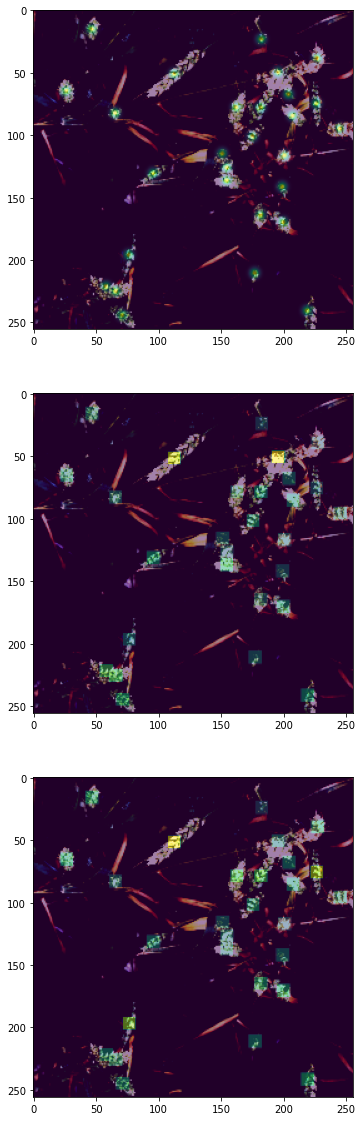

In [ ]:
train_gen = DataGenerator(
    list(range(len(train_df))), 
    df=df,
    target_df=df,
    batch_size=config.batch_size,
    dim=(1024,1024),
    n_classes=config.num_classes,
    image_paths=train_df,
    shuffle=True
)

img, regr = train_gen.__getitem__(1)
hm = regr[1][0][:,:,0]
width = regr[0][0][:,:,1]
height = regr[0][0][:,:,2]

img = cv2.resize(img[0], (256,256))

nrow, ncol = 3, 1
fig, axes = plt.subplots(nrow, ncol, figsize=(20, 20))
axes = axes.flatten()
for i, ax in enumerate(axes):
  if i == 0:
    ax.imshow(img)
    ax.imshow(hm, alpha=0.5)
  elif i == 1:
    ax.imshow(img)
    ax.imshow(width, alpha=0.5)
  else:
    ax.imshow(img)
    ax.imshow(height, alpha=0.5)

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
import keras
import tensorflow as tf
import keras.backend as K
from keras.layers import Dense, Activation, Input, Conv2D, BatchNormalization, Add, UpSampling2D, ZeroPadding2D, Lambda, Concatenate, Dropout, SpatialDropout2D
from keras.models import Sequential, Model
from tensorflow.keras.utils import get_file

In [ ]:
weights_path = get_file('centernet.hdf5',
                          'https://github.com/see--/keras-centernet/releases/download/0.1.0/ctdet_coco_hg.hdf5',
                          cache_subdir='/kaggle/working/', 
                          file_hash='ce01e92f75b533e3ff8e396c76d55d97ff3ec27e99b1bdac1d7b0d6dcf5d90eb')

def HourglassNetwork(heads, num_stacks, cnv_dim=256, inres=(512, 512), weights_path='/kaggle/working/centernet.hdf5',
                     dims=[256, 384, 384, 384, 512]):
    """Instantiates the Hourglass architecture.
    Optionally loads weights pre-trained on COCO.
    Note that the data format convention used by the model is
    the one specified in your Keras config at `~/.keras/keras.json`.
    # Arguments
      num_stacks: number of hourglass modules.
      cnv_dim: number of filters after the resolution is decreased.
      inres: network input shape, should be a multiple of 128.
      weights: one of `None` (random initialization),
            'ctdet_coco' (pre-training on COCO for 2D object detection),
            'hpdet_coco' (pre-training on COCO for human pose detection),
            or the path to the weights file to be loaded.
      dims: numbers of channels in the hourglass blocks.
    # Returns
      A Keras model instance.
    # Raises
      ValueError: in case of invalid argument for `weights`,
          or invalid input shape.
    """
    
    input_layer = Input(shape=(inres[0], inres[1], 3), name='HGInput')
    inter = pre(input_layer, cnv_dim)
    prev_inter = None
    outputs = []
    for i in range(num_stacks):
        prev_inter = inter
        _heads, inter = hourglass_module(heads, inter, cnv_dim, i, dims)
        if i == 1:
            if _heads is not None:
                outputs.extend(_heads)
        if i < num_stacks - 1:
            inter_ = Conv2D(cnv_dim, 1, use_bias=False, name='inter_.%d.0' % i)(prev_inter)
            inter_ = BatchNormalization(epsilon=1e-5, name='inter_.%d.1' % i)(inter_)

            cnv_ = Conv2D(cnv_dim, 1, use_bias=False, name='cnv_.%d.0' % i)(inter)
            cnv_ = BatchNormalization(epsilon=1e-5, name='cnv_.%d.1' % i)(cnv_)

            inter = Add(name='inters.%d.inters.add' % i)([inter_, cnv_])
            inter = Activation('relu', name='inters.%d.inters.relu' % i)(inter)
            inter = residual(inter, cnv_dim, 'inters.%d' % i)

    model = Model(inputs=input_layer, outputs=outputs)

    # load weights
    print('Loading weights...')
    model.load_weights(weights_path, by_name=True)
    print('Done!')

    return model

def hourglass_module(heads, bottom, cnv_dim, hgid, dims):
    # create left features , f1, f2, f4, f8, f16 and f32
    lfs = left_features(bottom, hgid, dims)

    # create right features, connect with left features
    rf1 = right_features(lfs, hgid, dims)
    rf1 = convolution(rf1, 3, cnv_dim, name='cnvs.%d' % hgid)

    # add 1x1 conv with two heads, inter is sent to next stage
    # head_parts is used for intermediate supervision
    if heads is not None:
        heads = create_heads(heads, rf1, hgid)
    return heads, rf1

def convolution(_x, k, out_dim, name, stride=1):
    padding = (k - 1) // 2
    _x = ZeroPadding2D(padding=padding, name=name + '.pad')(_x)
    _x = Conv2D(out_dim, k, strides=stride, use_bias=False, name=name + '.conv')(_x)
    _x = BatchNormalization(epsilon=1e-5, name=name + '.bn')(_x)
    _x = Activation('relu', name=name + '.relu')(_x)
    return _x

def residual(_x, out_dim, name, stride=1):
    shortcut = _x
    num_channels = K.int_shape(shortcut)[-1]
    _x = ZeroPadding2D(padding=1, name=name + '.pad1')(_x)
    _x = Conv2D(out_dim, 3, strides=stride, use_bias=False, name=name + '.conv1')(_x)
    _x = BatchNormalization(epsilon=1e-5, name=name + '.bn1')(_x)
    _x = Activation('relu', name=name + '.relu1')(_x)

    _x = Conv2D(out_dim, 3, padding='same', use_bias=False, name=name + '.conv2')(_x)
    _x = BatchNormalization(epsilon=1e-5, name=name + '.bn2')(_x)

    if num_channels != out_dim or stride != 1:
        shortcut = Conv2D(out_dim, 1, strides=stride, use_bias=False, name=name + '.shortcut.0')(
            shortcut)
        shortcut = BatchNormalization(epsilon=1e-5, name=name + '.shortcut.1')(shortcut)

    _x = Add(name=name + '.add')([_x, shortcut])
    _x = Activation('relu', name=name + '.relu')(_x)
    return _x

def pre(_x, num_channels):
    # front module, input to 1/4 resolution
    _x = convolution(_x, 7, 128, name='pre.0', stride=2)
    _x = residual(_x, num_channels, name='pre.1', stride=2)
    return _x

def left_features(bottom, hgid, dims):
    # create left half blocks for hourglass module
    # f1, f2, f4 , f8, f16, f32 : 1, 1/2, 1/4 1/8, 1/16, 1/32 resolution
    # 5 times reduce/increase: (256, 384, 384, 384, 512)
    features = [bottom]
    for kk, nh in enumerate(dims):
        pow_str = ''
        for _ in range(kk):
            pow_str += '.center'
        _x = residual(features[-1], nh, name='kps.%d%s.down.0' % (hgid, pow_str), stride=2)
        _x = residual(_x, nh, name='kps.%d%s.down.1' % (hgid, pow_str))
        features.append(_x)
    return features

def connect_left_right(left, right, num_channels, num_channels_next, name):
    # left: 2 residual modules
    left = residual(left, num_channels_next, name=name + 'skip.0')
    left = residual(left, num_channels_next, name=name + 'skip.1')

    # up: 2 times residual & nearest neighbour
    out = residual(right, num_channels, name=name + 'out.0')
    out = residual(out, num_channels_next, name=name + 'out.1')
    out = UpSampling2D(name=name + 'out.upsampleNN')(out)
    out = Add(name=name + 'out.add')([left, out])
    return out

def bottleneck_layer(_x, num_channels, hgid):
    # 4 residual blocks with 512 channels in the middle
    pow_str = 'center.' * 5
    _x = residual(_x, num_channels, name='kps.%d.%s0' % (hgid, pow_str))
    _x = residual(_x, num_channels, name='kps.%d.%s1' % (hgid, pow_str))
    _x = residual(_x, num_channels, name='kps.%d.%s2' % (hgid, pow_str))
    _x = residual(_x, num_channels, name='kps.%d.%s3' % (hgid, pow_str))
    return _x

def right_features(leftfeatures, hgid, dims):
    rf = bottleneck_layer(leftfeatures[-1], dims[-1], hgid)
    for kk in reversed(range(len(dims))):
        pow_str = ''
        for _ in range(kk):
            pow_str += 'center.'
        rf = connect_left_right(leftfeatures[kk], rf, dims[kk], dims[max(kk - 1, 0)], name='kps.%d.%s' % (hgid, pow_str))
    return rf

def create_heads(heads, rf1, hgid):
    _heads = []
    for head in heads:
        num_channels = heads[head]
        _x = Conv2D(256, 3, use_bias=True, padding='same', name=head + '.%d.0.conv' % hgid)(rf1)
        _x = Activation('relu', name=head + '.%d.0.relu' % hgid)(_x)
        _x = Conv2D(num_channels, 1, use_bias=True, name=head + '.%d.1' % hgid)(_x)
        _heads.append(_x)
    return _heads

kwargs = {
        'num_stacks': 2,
        'cnv_dim': 256,
        'inres': (1024, 1024),
        }
heads = {
        'regr': 2,
        'confidence': 1
        }
model = HourglassNetwork(heads=heads, **kwargs)

767033344/767024392 [==============================] - 11s 0us/step
Loading weights...
Done!


In [ ]:
alpha = .25
gamma = 2
def focal_loss_with_logits(logits, targets, alpha, gamma, y_pred):
  weight_a = alpha * (1 - y_pred) ** gamma * targets
  weight_b = (1 - alpha) * y_pred ** gamma * (1 - targets)
    
  return (tf.math.log1p(tf.exp(-tf.abs(logits))) + tf.nn.relu(-logits)) * (weight_a + weight_b) + logits * weight_b 

def focal_loss(y_true, y_pred):
  y_pred = tf.clip_by_value(y_pred, K.epsilon(), 1 - K.epsilon())
  logits = tf.math.log(y_pred / (1 - y_pred))

  loss = focal_loss_with_logits(logits=logits, targets=y_true, alpha=alpha, gamma=gamma, y_pred=y_pred)

  # or reduce_sum and/or axis=-1
  return tf.reduce_mean(loss)

from keras.losses import mean_squared_error

def criterion(y_true, y_pred): # Regression Loss
    mask = y_true[:,:,:, 0][:,:,:,np.newaxis]
    regr = y_true[:,:,:, 1:]

    regr_loss = mean_squared_error(regr, y_pred)
    loss = regr_loss

    return loss

def criterion2(y_true, y_pred): # Heatmap Loss
    mask = y_true[:,:,:, 0][:,:,:,np.newaxis]
    prediction = y_pred

    # Binary mask loss
    pred_mask = tf.sigmoid(prediction[:,:,:, 0])[:,:,:,np.newaxis]
    mask_loss = focal_loss(mask, pred_mask)
    mask_loss = tf.reduce_mean(mask_loss)

    loss = mask_loss
    return loss

from tensorflow.keras.optimizers import Adam
opt = Adam(lr=config.lr)
model.compile(optimizer=opt, loss=[criterion, criterion2], loss_weights=[5, 1])

In [ ]:
def _nms(heat, kernel=3):
  hmax = K.pool2d(heat, (kernel, kernel), padding='same', pool_mode='max')
  keep = K.cast(K.equal(hmax, heat), K.floatx())
  return heat * keep

def decode_ddd(regr_, hm_, k, output_stride):
  hm = K.sigmoid(K.expand_dims(hm_[:,:,:,0]))
  regr = regr_
  hm = _nms(hm)
  hm_shape = K.shape(hm)
  regr_shape = K.shape(regr)
  batch, width, cat = hm_shape[0], hm_shape[2], hm_shape[3]

  hm_flat = K.reshape(hm, (batch, -1))
  regr_flat = K.reshape(regr, (regr_shape[0], -1, regr_shape[-1]))

  def _process_sample(args):
    _hm, _regr = args
    _scores, _inds = tf.math.top_k(_hm, k=k, sorted=True)
    _classes = K.cast(_inds % cat, 'float32')
    _inds = K.cast(_inds / cat, 'int32')
    _xs = K.cast(_inds % width, 'float32')
    _ys = K.cast(K.cast(_inds / width, 'int32'), 'float32')
    _xs *= output_stride
    _ys *= output_stride

    _regr = K.gather(_regr, _inds)

    _width = _regr[:,0] * 256
    _height = _regr[:,1] * 256

    _detection = K.stack([_xs, _ys, _scores, _classes, _width, _height], -1)
    return _detection

  detections = K.map_fn(_process_sample, [hm_flat, regr_flat], dtype=K.floatx())
  return detections

def add_decoder(model, k=125, output_stride=4):
  def _decode(args):
    _regr, _hm = args
    return decode_ddd(_regr, _hm, k=k, output_stride=output_stride)

  output = Lambda(_decode)([*model.outputs])
  model = Model(model.input, output)
  return model

In [ ]:
from collections import namedtuple
from typing import List, Union

Box = namedtuple('Box', 'xmin ymin xmax ymax')

def calculate_iou(gt: List[Union[int, float]],
                  pred: List[Union[int, float]],
                  form: str = 'pascal_voc') -> float:
    """Calculates the IoU.
    
    Args:
        gt: List[Union[int, float]] coordinates of the ground-truth box
        pred: List[Union[int, float]] coordinates of the prdected box
        form: str gt/pred coordinates format
            - pascal_voc: [xmin, ymin, xmax, ymax]
            - coco: [xmin, ymin, w, h]
    Returns:
        IoU: float Intersection over union (0.0 <= iou <= 1.0)
    """
    if form == 'coco':
        bgt = Box(gt[0], gt[1], gt[0] + gt[2], gt[1] + gt[3])
        bpr = Box(pred[0], pred[1], pred[0] + pred[2], pred[1] + pred[3])
    else:
        bgt = Box(gt[0], gt[1], gt[2], gt[3])
        bpr = Box(pred[0], pred[1], pred[2], pred[3])
        

    overlap_area = 0.0
    union_area = 0.0

    # Calculate overlap area
    dx = min(bgt.xmax, bpr.xmax) - max(bgt.xmin, bpr.xmin)
    dy = min(bgt.ymax, bpr.ymax) - max(bgt.ymin, bpr.ymin)

    if (dx > 0) and (dy > 0):
        overlap_area = dx * dy

    # Calculate union area
    union_area = (
            (bgt.xmax - bgt.xmin) * (bgt.ymax - bgt.ymin) +
            (bpr.xmax - bpr.xmin) * (bpr.ymax - bpr.ymin) -
            overlap_area
    )

    return overlap_area / union_area

def find_best_match(gts, predd, threshold=0.5, form='pascal_voc'):
    """Returns the index of the 'best match' between the
    ground-truth boxes and the prediction. The 'best match'
    is the highest IoU. (0.0 IoUs are ignored).
    
    Args:
        gts: Coordinates of the available ground-truth boxes
        pred: Coordinates of the predicted box
        threshold: Threshold
        form: Format of the coordinates
        
    Return:
        Index of the best match GT box (-1 if no match above threshold)
    """
    best_match_iou = -np.inf
    best_match_idx = -1
    
    for gt_idx, ggt in enumerate(gts):
        iou = calculate_iou(ggt, predd, form=form)
        
        if iou < threshold:
            continue
        
        if iou > best_match_iou:
            best_match_iou = iou
            best_match_idx = gt_idx

    return best_match_idx

def calculate_precision(preds_sorted, gt_boxes, threshold=0.5, form='coco'):
    """Calculates precision per at one threshold.
    
    Args:
        preds_sorted: 
    """
    tp = 0
    fp = 0
    fn = 0

    fn_boxes = []

    for pred_idx, pred in enumerate(preds_sorted):
        best_match_gt_idx = find_best_match(gt_boxes, pred, threshold=threshold, form='coco')

        if best_match_gt_idx >= 0:
            # True positive: The predicted box matches a gt box with an IoU above the threshold.
            tp += 1

            # Remove the matched GT box
            gt_boxes = np.delete(gt_boxes, best_match_gt_idx, axis=0)

        else:
            # No match
            # False positive: indicates a predicted box had no associated gt box.
            fn += 1
            fn_boxes.append(pred)

    # False negative: indicates a gt box had no associated predicted box.
    fp = len(gt_boxes)
    precision = tp / (tp + fp + fn)
    return precision, fn_boxes, gt_boxes

def calculate_image_precision(preds_sorted, gt_boxes, thresholds=(0.5), form='coco', debug=False):
    
    n_threshold = len(thresholds)
    image_precision = 0.0
    
    for threshold in thresholds:
        precision_at_threshold, _, _ = calculate_precision(preds_sorted,
                                                           gt_boxes,
                                                           threshold=threshold,
                                                           form=form
                                                          )
        if debug:
            print("@{0:.2f} = {1:.4f}".format(threshold, precision_at_threshold))

        image_precision += precision_at_threshold / n_threshold
    
    return image_precision

In [ ]:
def calcmAP(model, threshold=0.5):
  model_ = add_decoder(model)
  
  iou_thresholds = [x for x in np.arange(0.5, 0.76, 0.05)]
  
  precision = []

  for idx in trange(len(val_df)):
    image_path = val_df[idx]
    img = cv2.cvtColor(cv2.imread(f'{config.IMAGE_PATH}{image_path}'), cv2.COLOR_BGR2RGB)
    img = normalize_image(img)
    
    image_id = image_path[:-4]
    bbox = df[df['image_id']==image_id]['bbox']
    boxes = get_boxes(bbox)

    out = model_.predict(img[None])

    pred_box,scores=[],[]

    for detection in out[0]:
      if detection[2] > threshold:
        x, y, score, _, width, height = detection
        pred_box.append([max(x-(width/2.), 0), max(y-(height/2.), 0), width, height])
        scores.append(score)

    pred_box = np.array(pred_box, dtype=np.int32)
    scores = np.array(scores)

    preds_sorted_idx = np.argsort(scores)[::-1]
    preds_sorted = pred_box[preds_sorted_idx]

    if len(boxes) > 0:
      image_precision = calculate_image_precision(preds_sorted, boxes,
                                                thresholds=iou_thresholds,
                                                form='coco', debug=False)
      precision.append(image_precision)
    else:
      if len(preds_sorted) > 0:
        precision.append(0)
  
  precision = np.array(precision)
  return np.mean(precision)

In [ ]:
class SaveBestmAP(tf.keras.callbacks.Callback):
  def __init__(self, path):
    super(SaveBestmAP, self).__init__()
    self.best_weights = None
    self.path = path

  def on_train_begin(self, logs=None):
    self.best = 0

  def on_epoch_end(self, epoch, logs=None):
    current = calcmAP(self.model, 0.4)
    if np.greater(current, self.best):
      self.best = current
      self.best_weights = self.model.get_weights()
      print(f'Best mAP: {current}, saving...')
      self.model.save_weights(self.path)
    else:
      print(f'Current mAP: {current}')
  
  def on_train_end(self, logs=None):
    print(f'Loading best model...')
    self.model.load_weights(self.path)

In [ ]:
from keras.callbacks import ReduceLROnPlateau

train_gen = DataGenerator(
    list(range(len(train_df))), 
    df=df,
    target_df=df,
    batch_size=config.batch_size,
    dim=(1024,1024),
    n_classes=config.num_classes,
    image_paths=train_df,
    shuffle=True
)

val_gen = DataGenerator(
    list(range(len(val_df))), 
    df=df,
    target_df=df,
    batch_size=config.batch_size,
    dim=(1024,1024),
    n_classes=config.num_classes,
    image_paths=val_df,
    shuffle=False
)

checkpoint1 = ModelCheckpoint(
    'hourglass1.h5',
    monitor='loss', 
    verbose=0, 
    save_best_only=True,
    save_weights_only=True,
    mode='auto'
)

checkpoint2 = ModelCheckpoint(
    'hourglass1-2.h5',
    monitor='loss', 
    verbose=0, 
    save_best_only=False,
    save_weights_only=True,
    mode='auto'
)

reducelr = ReduceLROnPlateau(
    monitor='loss',
    factor=0.25,
    patience=2,
    min_lr=1e-5,
    verbose=1
)

savemAP = SaveBestmAP('hourglass1-3.h5')

history = model.fit_generator(
    train_gen,
    validation_data=val_gen,
    #epochs=config.epochs,
    epochs=3,
    callbacks=[reducelr, checkpoint1, checkpoint2, savemAP],
    use_multiprocessing=False,
    workers=4
)

Epoch 1/3
  22/2695 [..............................] - ETA: 89:49:28 - loss: 0.0564 - regr.1.1_loss: 0.0086 - confidence.1.1_loss: 0.0134

In [ ]:
test_img = f'train/{val_df[0]}'

bbox = df[df['image_id']==val_df[0][:-4]]['bbox']
boxes = get_boxes(bbox)

img = cv2.cvtColor(cv2.imread(test_img), cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [ ]:
img = normalize_image(img)
regr, hm = model.predict(img[None])

In [ ]:
plt.imshow(regr[0][:,:,0])

In [ ]:
plt.imshow(regr[0][:,:,1])

In [ ]:
model_ = add_decoder(model)

In [ ]:
img = cv2.cvtColor(cv2.imread(test_img), cv2.COLOR_BGR2RGB)
img = normalize_image(img)
out = model_.predict(img[None]) # bs x 125 x 6

In [ ]:
pred_box,scores=[],[]

for detection in out[0]:
  if detection[2] > 0.25:
    x, y, score, _, width, height = detection
    pred_box.append([max(x-(width/2.), 0), max(y-(height/2.), 0), width, height])
    scores.append(score)

pred_box = np.array(pred_box, dtype=np.int32)
scores = np.array(scores)

preds_sorted_idx = np.argsort(scores)[::-1]
preds_sorted = pred_box[preds_sorted_idx]

In [ ]:
preds_sorted

In [ ]:
def show_result(sample_id, preds, gt_boxes):
    sample = cv2.cvtColor(cv2.imread(test_img), cv2.COLOR_BGR2RGB)

    fig, ax = plt.subplots(1, 1, figsize=(16, 8))

    for pred_box in preds:
        cv2.rectangle(
            sample,
            (pred_box[0], pred_box[1]),
            (pred_box[0] + pred_box[2], pred_box[1] + pred_box[3]),
            (220, 0, 0), 2
        )

    if gt_boxes is not None:
      for gt_box in gt_boxes:    
          cv2.rectangle(
              sample,
              (gt_box[0], gt_box[1]),
              (gt_box[0] + gt_box[2], gt_box[1] + gt_box[3]),
              (0, 0, 220), 2
          )

    ax.set_axis_off()
    ax.imshow(sample)
    ax.set_title("RED: Predicted | BLUE - Ground-truth")

In [ ]:
iou_thresholds = [x for x in np.arange(0.5, 0.76, 0.05)]
image_precision = calculate_image_precision(preds_sorted, boxes,
                                                thresholds=iou_thresholds,
                                                form='coco', debug=False)
print(f'Score: {image_precision}')

show_result(1, preds_sorted, boxes)

9) DETR

10) Hãy đề xuất đề tài nghiên cứu cho project cuối khóa. Phác thảo các bước cần triển khai trong nghiên cứu đó bao gồm: nội dung, timeline ước tính và kết quả.

Chủ đề cuối khóa: **Nhận dạng lúa mì dựa trên R-CNN**

Việc nhận dạng lúa mì có ý nghĩa rất lớn trong nông nghiệp. Dựa trên việc nhận này, ta có thể xác định được kích thước, số lượng, mật độ của các bông lúa trong từng thời kì. Dựa trên những số liệu đo được, ta có thể đánh giá được mức độ ảnh hưởng của các yếu tố như giống lúa, nhiệt độ, độ ẩm, ánh sáng, dinh dưỡng trong từng thời kì phát triển của cây. Căn cứ trên những đánh giá này mà người ta có thể đưa ra điều chỉnh phù hợp cho từng thời kỳ để cây lúa phát triển và kết quả thu hoạch cao nhất.

1. Tìm hiểu tổng quan về bài toán phát hiện đối tượng (Hoàn thành)

2. Tìm hiểu kiến trúc CNN (Hoàn thành)

3. Kiến trúc họ RCNN (20/03-09/04)

4. Ứng dụng Faster R-CNN cho nhận dạng lúa mì (10/04-kết thúc khóa học)